# Relative Humidity
## Exploratory Data Analysis
---

### Data Set Information:

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities. Missing values are tagged with -200 value.
This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

### Attribute Information:
|Attribute|	|Description|
|-|	|-|
|Date|	|Date (DD/MM/YYYY) |
|Time|	|Time (HH.MM.SS) |
|CO(GT)|	|True hourly averaged concentration CO in mg/m^3 (reference analyzer) |
|PT08.S1(CO)|	|PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)|
|NMHC(GT)|	|True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)|
|C6H6(GT)|	|True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) |
|PT08.S2(NMHC)|	|PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) |
|NOx(GT)|	|True hourly averaged NOx concentration in ppb (reference analyzer) |
|PT08.S3(NOx)|	|PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) |
|NO2(GT)|	|True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) |
|PT08.S4(NO2)|	|PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) |
|PT08.S5(O3)|	|PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) |
|T|	|Temperature in Â°C |
|RH|	|Relative Humidity (%) |
|AH|	|Absolute Humidity|

###  Hypothesis
---
predict the **Relative Humidity** of a given point of time based on the all other features affecting the change in relative humidity.


### Load the data

In [1]:
# Import libraries necessary for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Air Quality dataset
df = pd.read_csv('AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [3]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [4]:
print("The data contain {0} row, and {1} column.".format(df.shape[0], df.shape[1]))

The data contain 9471 row, and 15 column.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [6]:
df.dtypes

Date              object
Time              object
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

## Feature Engineering
---

In [7]:
# drop all the rows which have NaN values for all the columns
df.dropna(how='all', inplace=True)

**Convert date to the datetime object and to proper format**

In [8]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

**Create Hour column: Split hour from time**

In [9]:
df['Hour']= df['Time'].apply(lambda x: int(x.split(':')[0]))

**Create Week cloumn(The day of the week with Monday=0, Sunday=6)**

In [10]:
df['Weekday'] = df.Date.dt.weekday

**Create Weekend cloumn (0 if it's not in the weekend, one otherwise)**

In [11]:
df['Weekend'] = df.Weekday.apply(lambda x: 0 if ((x >= 0) & (x < 5)) else 1)

**Set the index as date**

In [12]:
df.set_index('Date',inplace=True)

**Create Month column**

In [13]:
df['Month'] = df.index.month 
df.tail()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,,
2005-04-04,10:00:00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568,10,0,0,4
2005-04-04,11:00:00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119,11,0,0,4
2005-04-04,12:00:00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406,12,0,0,4
2005-04-04,13:00:00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139,13,0,0,4
2005-04-04,14:00:00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028,14,0,0,4


In [51]:
df.drop(['Time'], axis=1, inplace=True)

## Clean the data and impute missing values
---

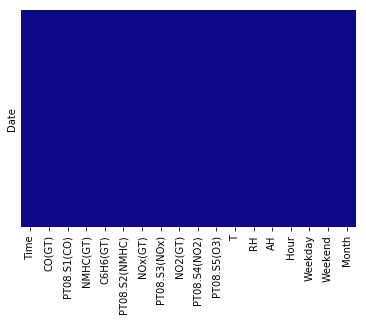

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma');

In [15]:
df.shape

(9357, 18)

In [16]:
# Missing values are tagged with -200 value so it will be replaces with NaN
df.replace(to_replace= -200, value= np.NaN, inplace= True)

In [17]:
df.isnull().sum()

Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
Hour                0
Weekday             0
Weekend             0
Month               0
dtype: int64

**Fill null values for CO(GT), NOX(GT), NO2(GT) with monthly average of a particular hour**

In [18]:
df["CO(GT)"] = df.groupby(['Month','Hour'])["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NOx(GT)"] = df.groupby(['Month','Hour'])["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NO2(GT)"] = df.groupby(['Month','Hour'])["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

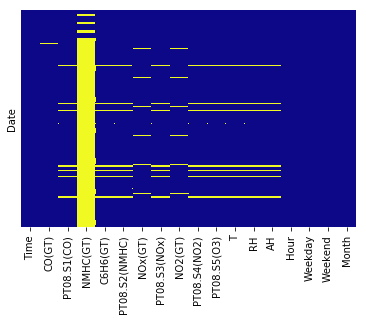

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma');

As we can see there are still some NaN values, this is because the values for a corresponding month and hour are NaN, hence the mean is also NaN. 
so the null values will be filled out with hourly average value.

In [20]:
df["CO(GT)"] = df.groupby('Hour')["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NOx(GT)"] = df.groupby('Hour')["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NO2(GT)"] = df.groupby('Hour')["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

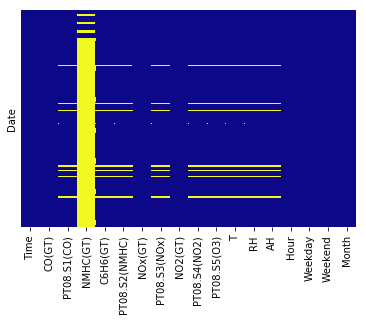

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma');

In [22]:
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

NMHC(GT)         90.231912
PT08.S2(NMHC)     3.911510
PT08.S1(CO)       3.911510
AH                3.911510
RH                3.911510
T                 3.911510
PT08.S5(O3)       3.911510
PT08.S4(NO2)      3.911510
PT08.S3(NOx)      3.911510
C6H6(GT)          3.911510
Month             0.000000
CO(GT)            0.000000
NO2(GT)           0.000000
NOx(GT)           0.000000
Weekend           0.000000
Hour              0.000000
Weekday           0.000000
Time              0.000000
dtype: float64

**90% of NMHC(GT) values are missing, so it's better to drop the column**

In [23]:
# drop NMHC(GT) column
df.drop('NMHC(GT)',axis=1,inplace=True) 

as these are Hourly values, we can assume strong relationship between consecutive values for gas concentrations and humidity, and thus forward fill will be a very good method to fill the NaN values.

In [24]:
df.fillna(method='ffill', inplace= True)

In [25]:
df.isnull().sum()

Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
Hour             0
Weekday          0
Weekend          0
Month            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 to 2005-04-04
Data columns (total 17 columns):
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Hour             9357 non-null int64
Weekday          9357 non-null int64
Weekend          9357 non-null int64
Month            9357 non-null int64
dtypes: float64(12), int64(4), object(1)
memory usage: 1.6+ MB


## Descriptive Statistics
---

In [27]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.108829,1102.730362,10.190392,942.548253,239.779007,832.742225,109.062833,1453.014535,1030.511916,18.317356,48.817431,1.017382,11.498557,3.009939,0.287272,6.310356
std,1.394195,219.588101,7.565771,269.581368,203.180983,255.709423,46.234749,347.434084,410.916759,8.821883,17.354326,0.404829,6.923182,2.000323,0.452514,3.438160
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,0.000000,0.000000,0.000000,1.000000
25%,1.100000,938.000000,4.400000,733.000000,101.000000,655.000000,73.433087,1228.000000,726.000000,11.900000,35.400000,0.726200,5.000000,1.000000,0.000000,3.000000
50%,1.800000,1062.000000,8.300000,911.000000,172.000000,807.000000,104.840000,1460.000000,964.000000,17.600000,48.900000,0.987500,11.000000,3.000000,0.000000,6.000000
75%,2.800000,1237.000000,14.000000,1117.000000,323.000000,968.000000,135.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700,18.000000,5.000000,1.000000,9.000000
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,23.000000,6.000000,1.000000,12.000000


In [28]:
df.corr()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
CO(GT),1.000000,0.819218,0.852164,0.843596,0.795366,-0.669833,0.690859,0.559844,0.781642,0.003109,0.016723,0.003783,0.385870,-0.106460,-0.188295,0.116273
PT08.S1(CO),0.819218,1.000000,0.886325,0.896015,0.672856,-0.777913,0.600655,0.676413,0.901460,0.037046,0.120042,0.121724,0.312248,-0.074829,-0.141935,-0.011183
C6H6(GT),0.852164,0.886325,1.000000,0.982485,0.670913,-0.737702,0.564177,0.756328,0.861688,0.189645,-0.054949,0.155825,0.326046,-0.173496,-0.240676,0.157086
PT08.S2(NMHC),0.843596,0.896015,0.982485,1.000000,0.659542,-0.798121,0.595498,0.769786,0.876588,0.231083,-0.082087,0.174921,0.370250,-0.157966,-0.225536,0.152358
NOx(GT),0.795366,0.672856,0.670913,0.659542,1.000000,-0.626315,0.759968,0.211724,0.729036,-0.250816,0.169279,-0.158873,0.250740,-0.093159,-0.148020,0.161065
PT08.S3(NOx),-0.669833,-0.777913,-0.737702,-0.798121,-0.626315,1.000000,-0.604527,-0.535264,-0.795958,-0.132851,-0.060581,-0.216738,-0.312344,0.083337,0.135127,-0.074032
NO2(GT),0.690859,0.600655,0.564177,0.595498,0.759968,-0.604527,1.000000,0.126759,0.642825,-0.183661,-0.129726,-0.352763,0.397113,-0.091092,-0.155950,-0.176946
PT08.S4(NO2),0.559844,0.676413,0.756328,0.769786,0.211724,-0.535264,0.126759,1.000000,0.579192,0.558374,-0.015158,0.630272,0.209940,-0.108902,-0.170560,0.204270
PT08.S5(O3),0.781642,0.901460,0.861688,0.876588,0.729036,-0.795958,0.642825,0.579192,1.000000,-0.044829,0.137821,0.055483,0.229195,-0.135966,-0.203733,0.067472
T,0.003109,0.037046,0.189645,0.231083,-0.250816,-0.132851,-0.183661,0.558374,-0.044829,1.000000,-0.570775,0.654768,0.196990,0.006851,-0.007059,0.286659


In [29]:
df.cov()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
CO(GT),1.943780,250.802463,8.988762,317.064848,225.306394,-238.801470,44.532930,271.183196,447.801045,0.038239,0.404624,0.002135,3.724520,-0.296899,-0.118794,0.557348
PT08.S1(CO),250.802463,48218.934021,1472.498531,53041.276854,30020.207333,-43680.381826,6098.207756,51605.130362,81340.885909,71.764236,457.456806,10.820699,474.695154,-32.868205,-14.103593,-8.443135
C6H6(GT),8.988762,1472.498531,57.240894,2003.867111,1031.340890,-1427.186231,197.350118,1988.089783,2678.904812,12.657715,-7.214762,0.477268,17.078048,-2.625685,-0.823982,4.086169
PT08.S2(NMHC),317.064848,53041.276854,2003.867111,72674.114094,36125.644733,-55018.074777,7422.306824,72099.482732,97104.427199,549.565815,-384.037091,19.089872,691.019709,-85.182983,-27.513008,141.215463
NOx(GT),225.306394,30020.207333,1031.340890,36125.644733,41282.512054,-32540.386184,7139.158969,14946.022213,60867.520856,-449.571634,596.890185,-13.067881,352.705743,-37.862400,-13.609245,112.515124
PT08.S3(NOx),-238.801470,-43680.381826,-1427.186231,-55018.074777,-32540.386184,65387.308919,-7147.121458,-47554.004376,-83635.527069,-299.690010,-268.835962,-22.436359,-552.949282,42.626761,15.635838,-65.086941
NO2(GT),44.532930,6098.207756,197.350118,7422.306824,7139.158969,-7147.121458,2137.652009,2036.193863,12212.804949,-74.911052,-104.088247,-6.602713,127.112590,-8.424552,-3.262762,-28.127823
PT08.S4(NO2),271.183196,51605.130362,1988.089783,72099.482732,14946.022213,-47554.004376,2036.193863,120710.442713,82689.147326,1711.427559,-91.397838,88.648624,504.979179,-75.684839,-26.815206,244.007887
PT08.S5(O3),447.801045,81340.885909,2678.904812,97104.427199,60867.520856,-83635.527069,12212.804949,82689.147326,168852.582719,-162.506962,982.830227,9.229593,652.026818,-111.759685,-37.883287,95.324967
T,0.038239,71.764236,12.657715,549.565815,-449.571634,-299.690010,-74.911052,1711.427559,-162.506962,77.825620,-87.384473,2.338408,12.031246,0.120905,-0.028180,8.694656


# Plotting
---

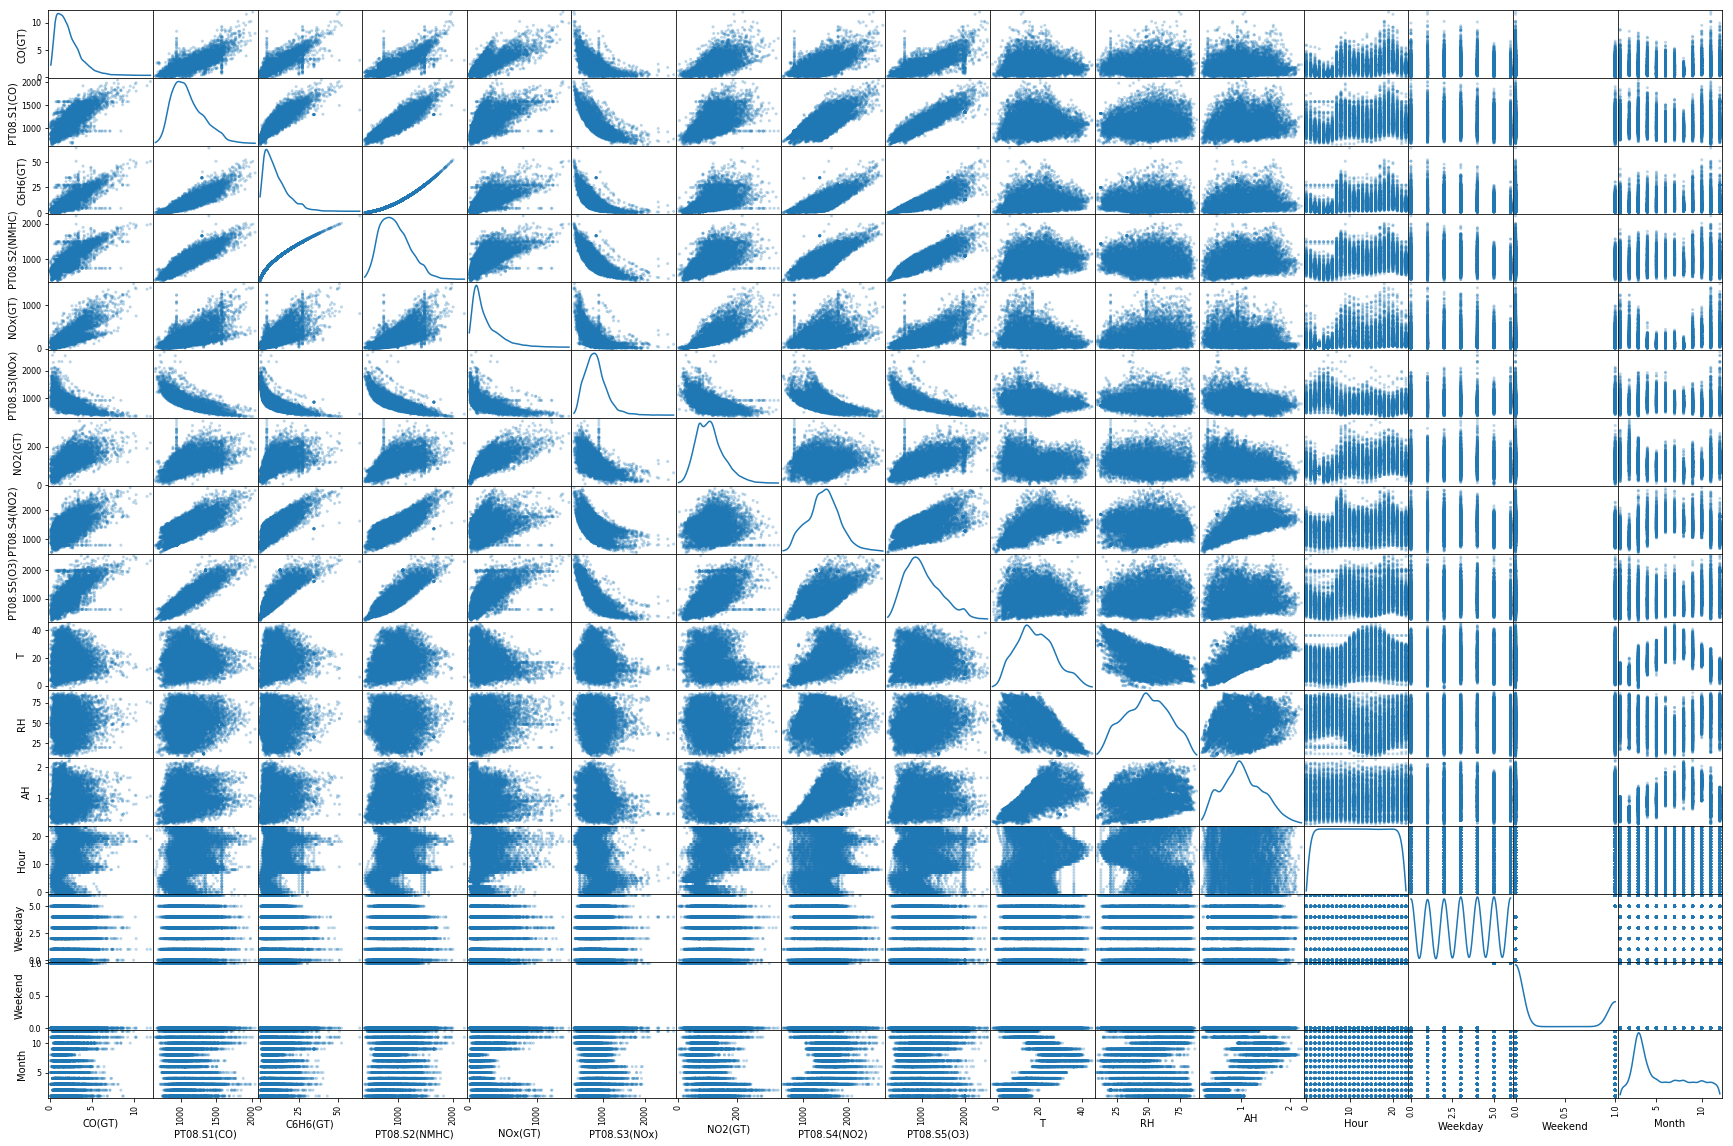

In [30]:
# Produce a scatter matrix
pd.scatter_matrix(df, alpha = 0.3, figsize = (30,20), diagonal = 'kde');

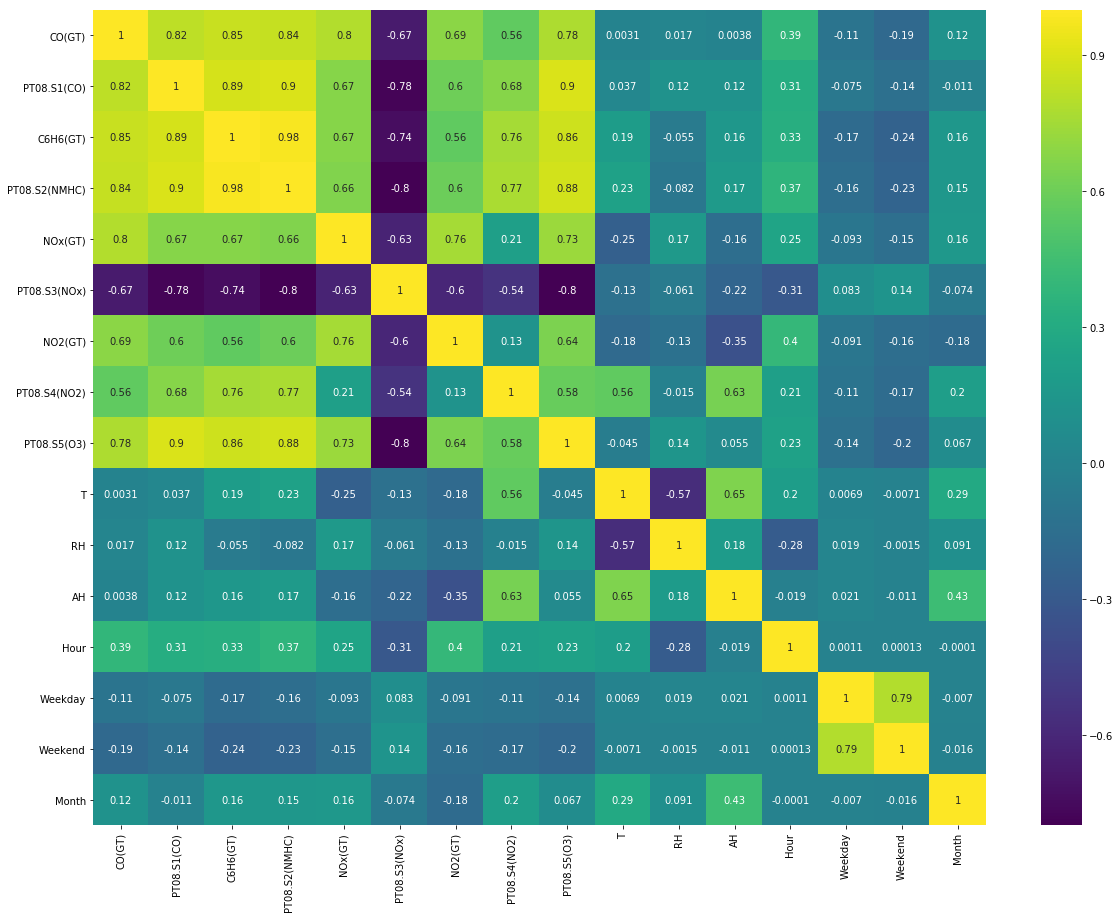

In [31]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

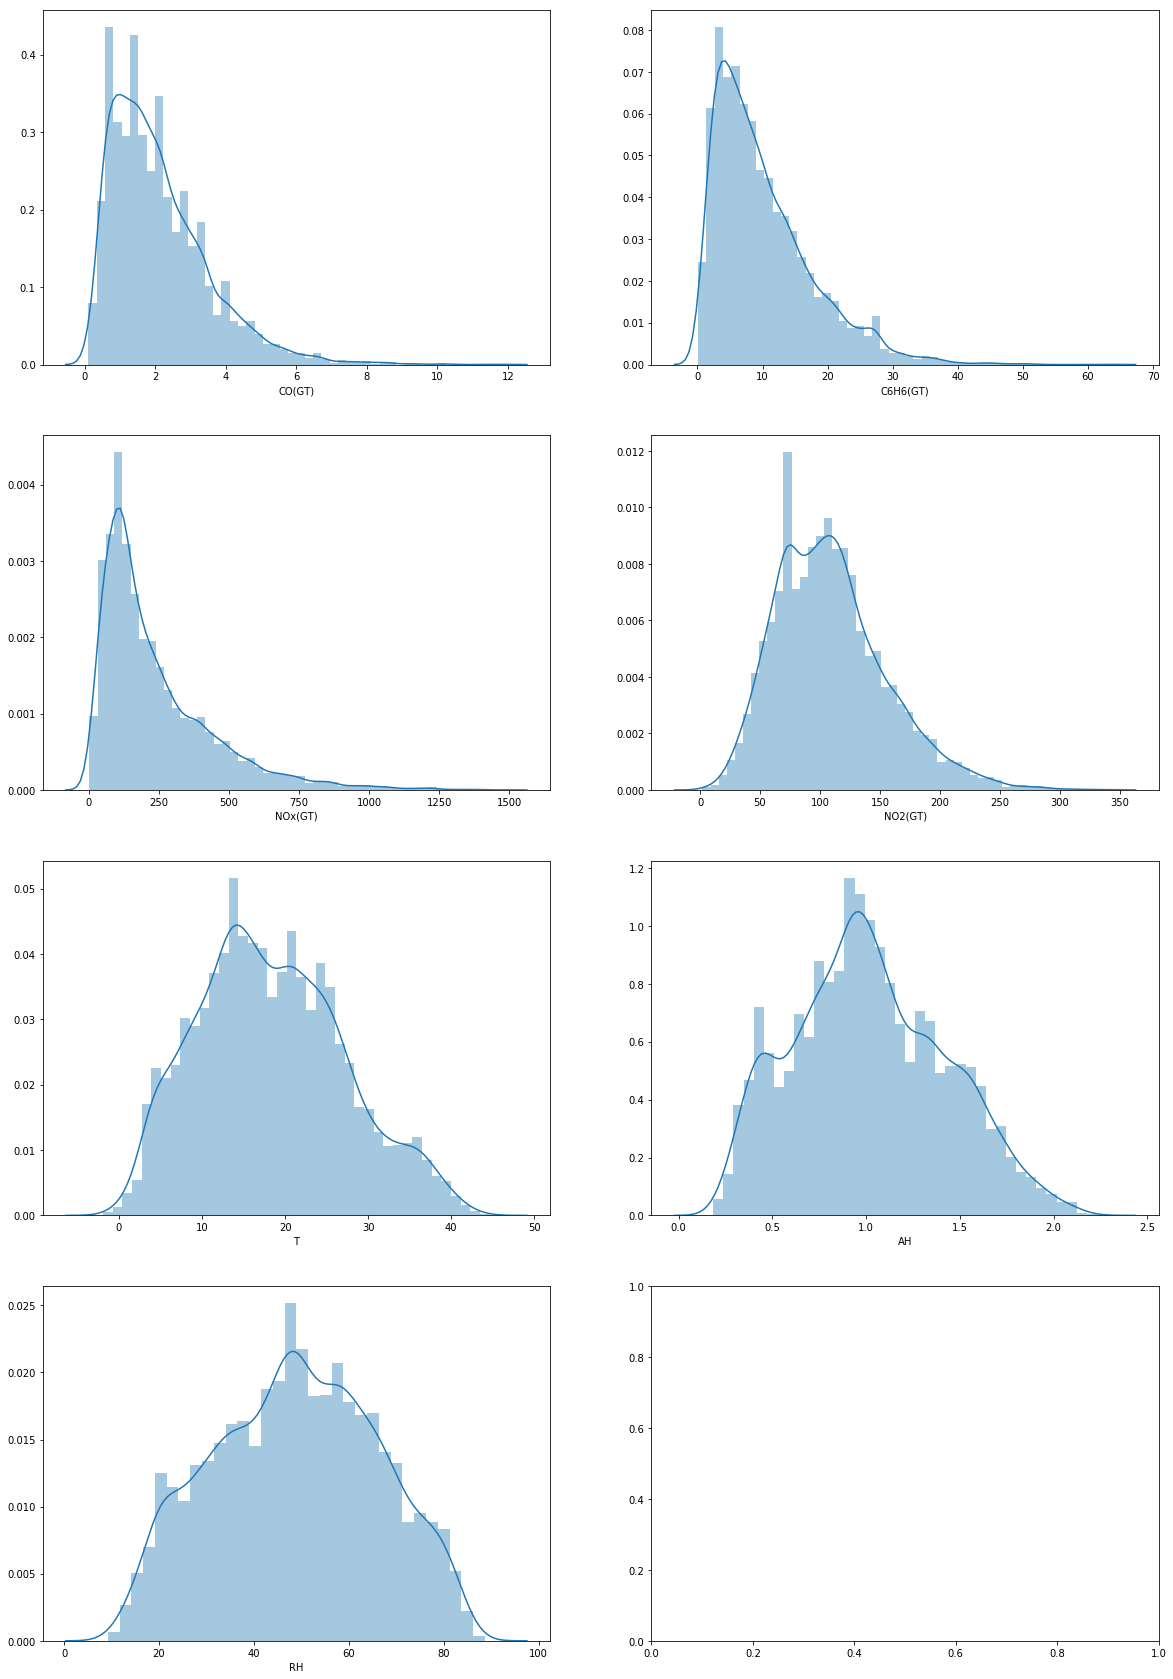

In [32]:
fig, ((ax1, ax2),(ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize=(20,30))
sns.distplot(df["CO(GT)"], ax = ax1)
sns.distplot(df["C6H6(GT)"], ax = ax2)
sns.distplot(df["NOx(GT)"], ax = ax3)
sns.distplot(df["NO2(GT)"], ax = ax4)
sns.distplot(df["T"], ax = ax5)
sns.distplot(df["AH"], ax = ax6)
sns.distplot(df["RH"], ax = ax7);

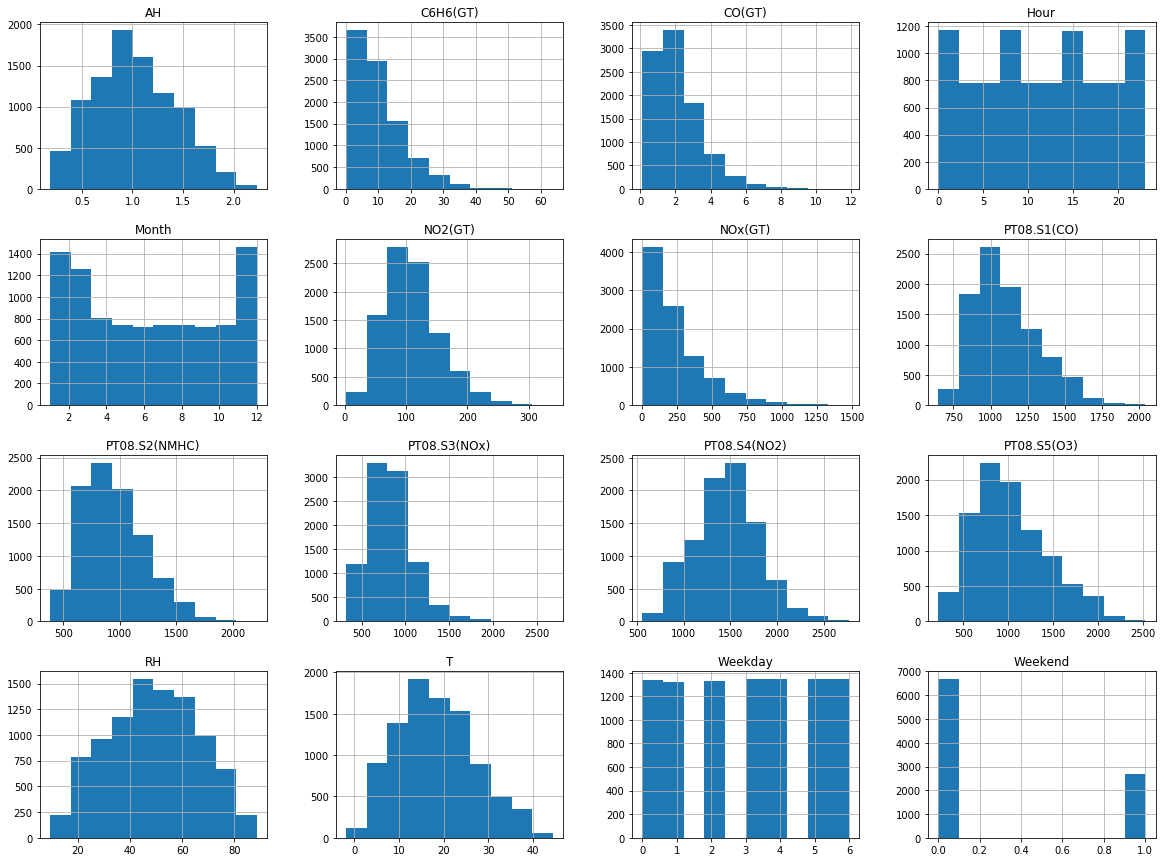

In [33]:
df[df.dtypes[(df.dtypes=="float64") | (df.dtypes=="int64")].index.values].hist(figsize=[20,15]);

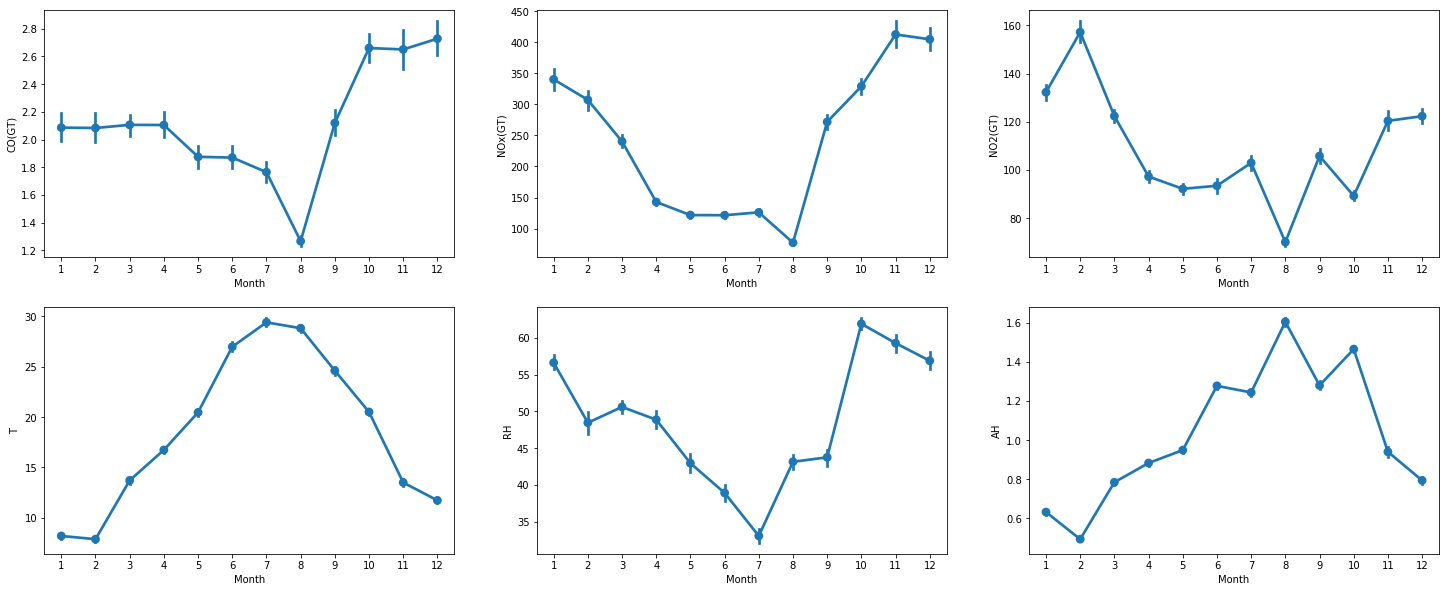

In [34]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
sns.pointplot(x="Month", y="CO(GT)", data=df, ax = ax1)
sns.pointplot(x="Month", y="NOx(GT)", data=df, ax = ax2)
sns.pointplot(x="Month", y="NO2(GT)", data=df, ax = ax3);
sns.pointplot(x="Month", y="T", data=df, ax = ax4)
sns.pointplot(x="Month", y="RH", data=df, ax = ax5)
sns.pointplot(x="Month", y="AH", data=df, ax = ax6);

* We can see that **NOx** show higher concentration from September to February (colder months).
* **NO2** shows high concentration in January and February compared to other months.
* **CO** shows high concentration from October to December (colder months).
* **Absolute Humidity** goes higher during rainy season(June to October) where as the **temperature** goes higher during summer.

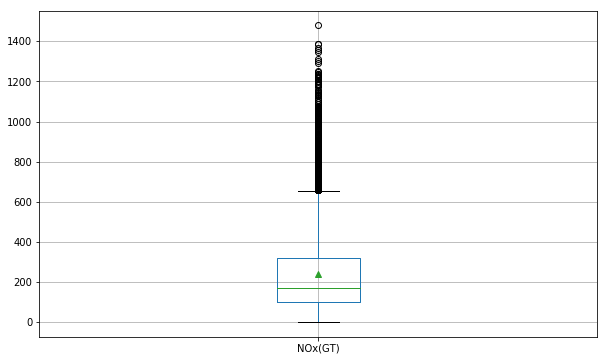

In [35]:
df.boxplot(column='NOx(GT)',showmeans=True, figsize=(10,6));

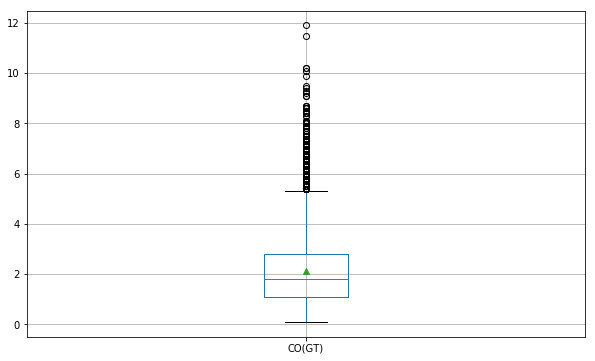

In [36]:
df.boxplot(column='CO(GT)',showmeans=True, figsize=(10,6));

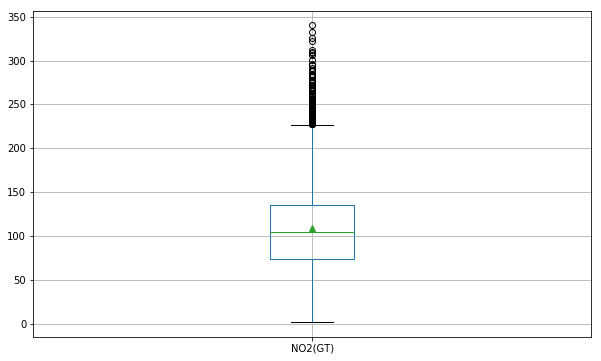

In [37]:
df.boxplot(column='NO2(GT)',showmeans=True, figsize=(10,6));

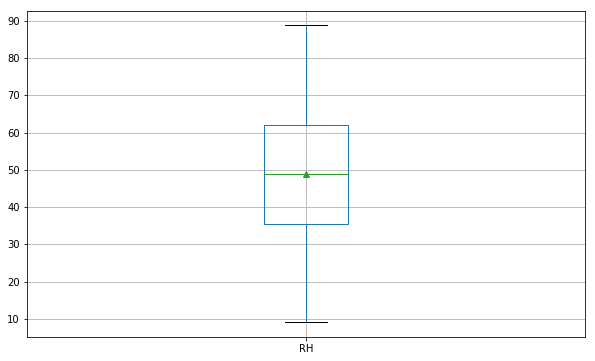

In [38]:
df.boxplot(column='RH',showmeans=True, figsize=(10,6));

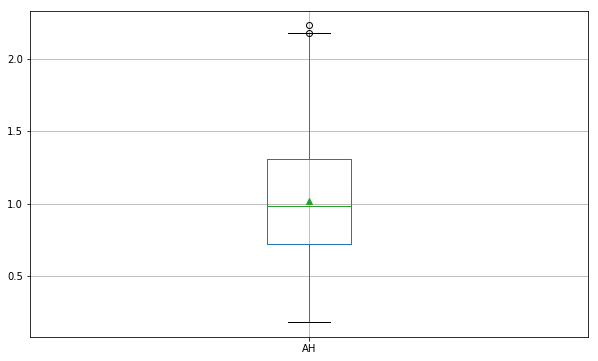

In [39]:
df.boxplot(column='AH',showmeans=True, figsize=(10,6));

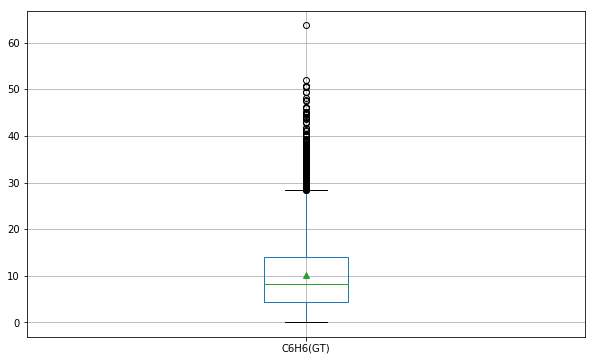

In [40]:
df.boxplot(column='C6H6(GT)',showmeans=True, figsize=(10,6));

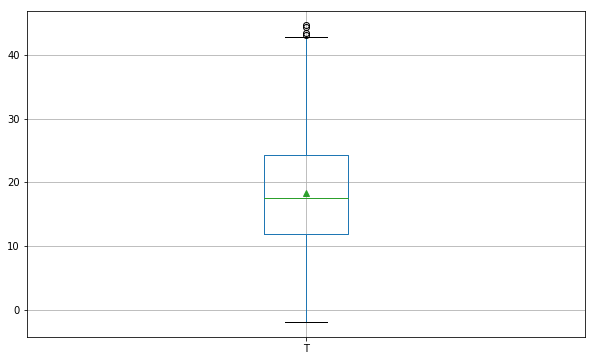

In [41]:
df.boxplot(column='T',showmeans=True, figsize=(10,6));

**the degree of linearity between RH output and other input features**

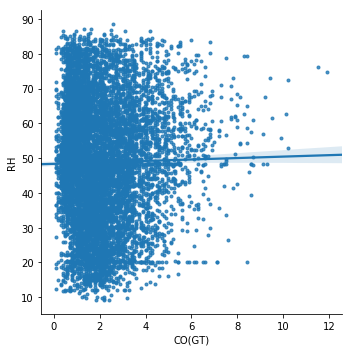

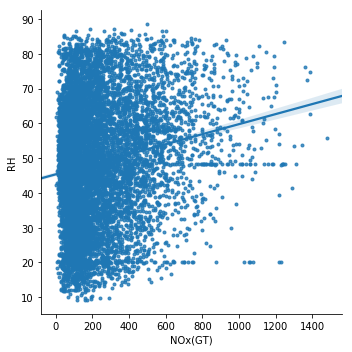

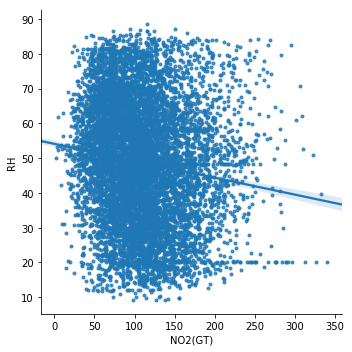

In [42]:
sns.lmplot(x='CO(GT)',y='RH',data=df,markers='.');
plt.show()
sns.lmplot(x='NOx(GT)',y='RH',data=df,markers='.');
plt.show()
sns.lmplot(x='NO2(GT)',y='RH',data=df,markers='.');
plt.show()

* NOx(GT) seems to be positively correlated with RH, whereas NO2(GT) shows negative correlation with RH.

# Air Quality on the weekdays vs.  weekends
---

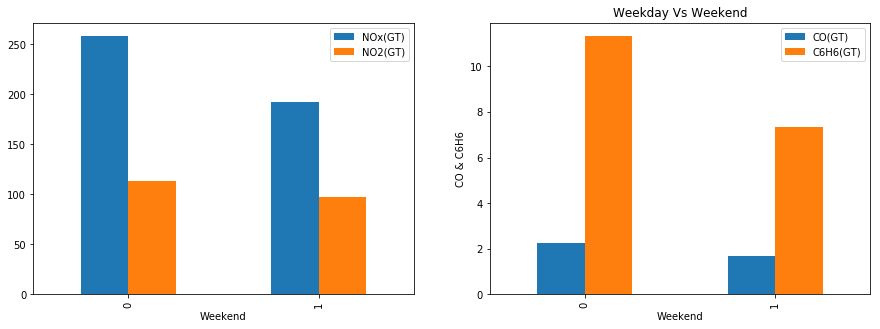

In [43]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
Weekend = df[['NOx(GT)', 'NO2(GT)','Weekend']].groupby('Weekend').mean().reset_index().set_index('Weekend')
Weekend.plot.bar(figsize=(15,5), ax = ax1)
plt.title('Weekday Vs Weekend')
plt.ylabel("NOx & NO2");

Weekend2 = df[['CO(GT)', 'C6H6(GT)','Weekend']].groupby('Weekend').mean().reset_index().set_index('Weekend')
Weekend2.plot.bar(figsize=(15,5), ax = ax2)
plt.title('Weekday Vs Weekend')
plt.ylabel("CO & C6H6");

**The gas concentration on Weekdays are higher than on Weekends.**

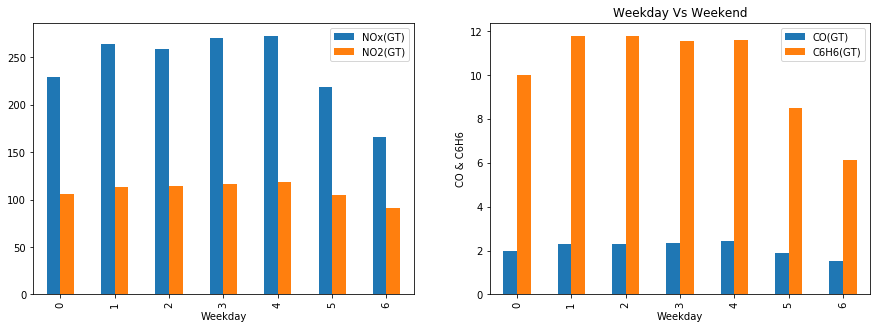

In [44]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
Weekday = df[['NOx(GT)', 'NO2(GT)', 'Weekday']].groupby('Weekday').mean().reset_index().set_index('Weekday')
Weekday.plot.bar(figsize=(15,5), ax = ax1)
plt.title('Weekday Vs Weekend')
plt.ylabel("NOx & NO2");

Weekday2 = df[['CO(GT)', 'C6H6(GT)', 'Weekday']].groupby('Weekday').mean().reset_index().set_index('Weekday')
Weekday2.plot.bar(figsize=(15,5), ax = ax2)
plt.title('Weekday Vs Weekend')
plt.ylabel("CO & C6H6");

**Among the weekdays, the gases concentration reach the lowest level on Sunday.**

# Outlier Detection
---

In [45]:
new_df = df.drop(['Time','Hour','Month'], axis=1)
log_data = np.log(new_df)

In [46]:
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature], 25.)
    Q3 = np.percentile(log_data[feature], 75.)
    step = (Q3-Q1)*1.5
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(df[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])

Data points considered outliers for the feature 'CO(GT)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-05-11,2:00:00,0.2,787.0,1.6,549.0,28.000000,1366.0,43.000000,1317.0,596.0,14.3,61.9,1.0031,2,1,0,5
2004-05-11,3:00:00,0.2,799.0,1.6,555.0,112.121511,1327.0,73.433087,1320.0,643.0,12.8,66.0,0.9690,3,1,0,5
2004-05-18,3:00:00,0.2,812.0,1.2,521.0,112.121511,1413.0,73.433087,1233.0,469.0,21.2,32.9,0.8178,3,1,0,5
2004-05-24,2:00:00,0.2,774.0,1.0,500.0,13.000000,1536.0,21.000000,1169.0,352.0,15.8,45.2,0.8052,2,0,0,5
2004-05-24,5:00:00,0.1,749.0,0.7,466.0,23.000000,1803.0,29.000000,1089.0,307.0,16.1,36.5,0.6640,5,0,0,5
2004-05-25,1:00:00,0.2,837.0,2.7,634.0,41.000000,1200.0,56.000000,1150.0,669.0,15.5,32.2,0.5641,1,1,0,5
2004-05-25,5:00:00,0.1,774.0,1.7,560.0,45.000000,1386.0,51.000000,1107.0,532.0,11.6,40.0,0.5462,5,1,0,5
2004-05-25,6:00:00,0.2,798.0,2.6,630.0,40.000000,1291.0,45.000000,1125.0,536.0,13.4,34.5,0.5272,6,1,0,5
2004-05-29,6:00:00,0.1,762.0,2.0,581.0,41.000000,1588.0,45.000000,1277.0,434.0,17.9,46.1,0.9383,6,5,1,5


Data points considered outliers for the feature 'PT08.S1(CO)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-14,20:00:00,5.900000,1898.0,23.1,1381.0,325.0,681.0,173.0,2103.0,1905.0,17.6,46.1,0.9210,20,6,1,3
2004-03-15,9:00:00,8.100000,1961.0,36.7,1701.0,478.0,537.0,149.0,2665.0,2184.0,14.8,54.3,0.9076,9,0,0,3
2004-03-15,18:00:00,6.100000,1917.0,32.1,1601.0,314.0,631.0,162.0,2447.0,1843.0,22.5,35.4,0.9547,18,0,0,3
2004-03-15,19:00:00,8.000000,2040.0,39.2,1754.0,404.0,542.0,187.0,2679.0,2122.0,20.4,42.5,1.0086,19,0,0,3
2004-03-15,20:00:00,6.500000,1895.0,31.0,1573.0,320.0,565.0,165.0,2443.0,1992.0,18.3,52.6,1.0945,20,0,0,3
2004-03-17,19:00:00,7.600000,1973.0,38.4,1737.0,411.0,617.0,194.0,2414.0,2306.0,23.1,26.5,0.7403,19,2,0,3
2004-03-17,20:00:00,6.700000,1975.0,35.1,1667.0,347.0,597.0,182.0,2416.0,2359.0,20.5,38.2,0.9133,20,2,0,3
2004-03-18,9:00:00,6.600000,1934.0,35.8,1682.0,421.0,541.0,151.0,2468.0,2051.0,14.3,50.6,0.8186,9,3,0,3
2004-04-15,19:00:00,7.300000,1875.0,33.7,1637.0,351.0,482.0,158.0,2446.0,2086.0,17.4,47.8,0.9392,19,3,0,4


Data points considered outliers for the feature 'C6H6(GT)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-22,3:00:00,0.400000,842.0,0.7,468.0,120.809524,1813.0,84.523810,1274.0,394.0,16.9,53.9,1.0309,3,0,0,3
2004-03-22,5:00:00,0.300000,845.0,0.7,472.0,15.000000,1786.0,23.000000,1278.0,378.0,16.5,53.9,1.0049,5,0,0,3
2004-03-23,5:00:00,0.300000,834.0,0.6,459.0,13.000000,1908.0,22.000000,1212.0,361.0,8.8,80.5,0.9147,5,1,0,3
2004-03-25,5:00:00,0.500000,878.0,0.6,457.0,12.000000,1935.0,20.000000,1158.0,344.0,9.9,66.8,0.8152,5,3,0,3
2004-04-07,3:00:00,0.300000,801.0,0.7,464.0,76.000000,1749.0,59.500000,1154.0,340.0,16.1,42.4,0.7718,3,2,0,4
2004-04-07,4:00:00,0.300000,804.0,0.7,468.0,12.000000,1826.0,19.000000,1166.0,320.0,15.7,45.4,0.8063,4,2,0,4
2004-04-12,4:00:00,0.300000,753.0,0.7,462.0,16.000000,1822.0,25.000000,955.0,274.0,13.9,30.9,0.4868,4,0,0,4
2004-04-12,5:00:00,0.300000,785.0,0.5,448.0,16.000000,1923.0,26.000000,1003.0,263.0,13.5,37.9,0.5852,5,0,0,4
2004-04-12,6:00:00,0.400000,835.0,0.7,472.0,33.000000,1756.0,49.000000,1117.0,314.0,13.9,43.6,0.6871,6,0,0,4


Data points considered outliers for the feature 'PT08.S2(NMHC)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-11-22,10:00:00,3.100000,1394.0,63.7,2214.0,801.000000,411.0,218.00000,1629.0,2311.0,6.2,51.8,0.4952,10,0,0,11
2005-01-25,5:00:00,0.880769,758.0,0.2,388.0,20.000000,1785.0,20.00000,765.0,274.0,3.7,56.3,0.4530,5,1,0,1
2005-01-25,6:00:00,0.926923,761.0,0.1,383.0,39.000000,1745.0,35.00000,787.0,289.0,3.3,58.1,0.4559,6,1,0,1
2005-01-26,5:00:00,0.880769,744.0,0.1,383.0,17.000000,1881.0,17.00000,720.0,253.0,2.7,53.9,0.4062,5,2,0,1
2005-03-01,3:00:00,0.200000,715.0,0.2,387.0,120.809524,1791.0,84.52381,559.0,227.0,0.1,40.0,0.2499,3,1,0,3


Data points considered outliers for the feature 'NOx(GT)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-11,5:00:00,0.700000,1066.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366,5,3,0,3
2004-03-22,4:00:00,0.687500,854.0,0.8,481.0,17.0,1756.0,27.0,1304.0,396.0,16.1,55.9,1.0153,4,0,0,3
2004-03-22,5:00:00,0.300000,845.0,0.7,472.0,15.0,1786.0,23.0,1278.0,378.0,16.5,53.9,1.0049,5,0,0,3
2004-03-23,5:00:00,0.300000,834.0,0.6,459.0,13.0,1908.0,22.0,1212.0,361.0,8.8,80.5,0.9147,5,1,0,3
2004-03-25,5:00:00,0.500000,878.0,0.6,457.0,12.0,1935.0,20.0,1158.0,344.0,9.9,66.8,0.8152,5,3,0,3
2004-03-31,4:00:00,0.500000,851.0,0.8,477.0,15.0,1699.0,26.0,1064.0,343.0,14.5,36.1,0.5928,4,2,0,3
2004-04-07,4:00:00,0.300000,804.0,0.7,468.0,12.0,1826.0,19.0,1166.0,320.0,15.7,45.4,0.8063,4,2,0,4
2004-04-12,4:00:00,0.300000,753.0,0.7,462.0,16.0,1822.0,25.0,955.0,274.0,13.9,30.9,0.4868,4,0,0,4
2004-04-12,5:00:00,0.300000,785.0,0.5,448.0,16.0,1923.0,26.0,1003.0,263.0,13.5,37.9,0.5852,5,0,0,4


Data points considered outliers for the feature 'PT08.S3(NOx)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-11,4:00:00,0.687500,1011.0,1.3,527.0,21.000000,1818.0,34.000000,1197.0,445.0,10.1,60.5,0.7465,4,3,0,3
2004-03-11,5:00:00,0.700000,1066.0,1.1,512.0,16.000000,1918.0,28.000000,1182.0,422.0,11.0,56.2,0.7366,5,3,0,3
2004-03-12,4:00:00,0.687500,831.0,1.1,506.0,21.000000,1893.0,32.000000,1134.0,384.0,6.1,65.9,0.6248,4,4,0,3
2004-03-12,5:00:00,0.600000,847.0,1.0,501.0,30.000000,1895.0,44.000000,1155.0,394.0,6.3,65.0,0.6233,5,4,0,3
2004-03-22,3:00:00,0.400000,842.0,0.7,468.0,120.809524,1813.0,84.523810,1274.0,394.0,16.9,53.9,1.0309,3,0,0,3
2004-03-22,4:00:00,0.687500,854.0,0.8,481.0,17.000000,1756.0,27.000000,1304.0,396.0,16.1,55.9,1.0153,4,0,0,3
2004-03-22,5:00:00,0.300000,845.0,0.7,472.0,15.000000,1786.0,23.000000,1278.0,378.0,16.5,53.9,1.0049,5,0,0,3
2004-03-23,5:00:00,0.300000,834.0,0.6,459.0,13.000000,1908.0,22.000000,1212.0,361.0,8.8,80.5,0.9147,5,1,0,3
2004-03-25,5:00:00,0.500000,878.0,0.6,457.0,12.000000,1935.0,20.000000,1158.0,344.0,9.9,66.8,0.8152,5,3,0,3


Data points considered outliers for the feature 'NO2(GT)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-11,5:00:00,0.700000,1066.0,1.1,512.0,16.0,1918.0,28.0,1182.0,422.0,11.0,56.2,0.7366,5,3,0,3
2004-03-19,5:00:00,0.500000,913.0,1.3,525.0,18.0,1620.0,28.0,1260.0,370.0,12.5,66.8,0.9620,5,4,0,3
2004-03-22,4:00:00,0.687500,854.0,0.8,481.0,17.0,1756.0,27.0,1304.0,396.0,16.1,55.9,1.0153,4,0,0,3
2004-03-22,5:00:00,0.300000,845.0,0.7,472.0,15.0,1786.0,23.0,1278.0,378.0,16.5,53.9,1.0049,5,0,0,3
2004-03-23,5:00:00,0.300000,834.0,0.6,459.0,13.0,1908.0,22.0,1212.0,361.0,8.8,80.5,0.9147,5,1,0,3
2004-03-25,4:00:00,0.500000,858.0,0.9,490.0,18.0,1707.0,28.0,1212.0,378.0,9.3,72.3,0.8496,4,3,0,3
2004-03-25,5:00:00,0.500000,878.0,0.6,457.0,12.0,1935.0,20.0,1158.0,344.0,9.9,66.8,0.8152,5,3,0,3
2004-03-31,4:00:00,0.500000,851.0,0.8,477.0,15.0,1699.0,26.0,1064.0,343.0,14.5,36.1,0.5928,4,2,0,3
2004-04-07,4:00:00,0.300000,804.0,0.7,468.0,12.0,1826.0,19.0,1166.0,320.0,15.7,45.4,0.8063,4,2,0,4


Data points considered outliers for the feature 'PT08.S4(NO2)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-15,19:00:00,8.000000,2040.0,39.2,1754.0,404.000000,542.0,187.000000,2679.0,2122.0,20.4,42.5,1.0086,19,0,0,3
2004-04-21,8:00:00,3.456000,1726.0,40.3,1776.0,231.160000,478.0,106.520000,2684.0,1940.0,14.0,58.2,0.9271,8,2,0,4
2004-06-08,8:00:00,5.800000,1377.0,36.1,1688.0,376.000000,525.0,125.000000,2746.0,1708.0,21.6,51.7,1.3130,8,1,0,6
2004-06-09,8:00:00,6.400000,1496.0,36.9,1705.0,357.000000,507.0,151.000000,2691.0,2147.0,23.4,46.1,1.3091,8,2,0,6
2004-10-26,18:00:00,9.500000,1908.0,52.1,2007.0,952.000000,325.0,180.000000,2775.0,2372.0,22.5,61.5,1.6579,18,1,0,10
2004-11-19,22:00:00,2.600000,667.0,3.6,689.0,207.000000,1210.0,120.000000,709.0,620.0,13.4,14.3,0.2185,22,4,0,11
2004-11-19,23:00:00,2.600000,695.0,4.0,711.0,204.000000,1193.0,110.000000,739.0,645.0,12.8,14.8,0.2180,23,4,0,11
2004-11-20,0:00:00,2.700000,683.0,3.6,686.0,243.000000,1240.0,121.000000,702.0,627.0,12.2,14.0,0.1988,0,5,1,11
2004-11-20,1:00:00,2.700000,695.0,4.0,709.0,264.000000,1236.0,126.000000,717.0,645.0,12.0,14.5,0.2029,1,5,1,11


Data points considered outliers for the feature 'PT08.S5(O3)':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-04-12,4:00:00,0.300000,753.0,0.7,462.0,16.000000,1822.0,25.000000,955.0,274.0,13.9,30.9,0.4868,4,0,0,4
2004-04-12,5:00:00,0.300000,785.0,0.5,448.0,16.000000,1923.0,26.000000,1003.0,263.0,13.5,37.9,0.5852,5,0,0,4
2004-04-25,5:00:00,0.300000,763.0,0.7,471.0,14.000000,1783.0,20.000000,1098.0,305.0,12.5,50.9,0.7346,5,6,1,4
2004-05-24,4:00:00,0.731146,753.0,0.5,437.0,14.000000,1904.0,19.000000,1110.0,301.0,16.3,41.0,0.7513,4,0,0,5
2004-05-24,5:00:00,0.100000,749.0,0.7,466.0,23.000000,1803.0,29.000000,1089.0,307.0,16.1,36.5,0.6640,5,0,0,5
2004-11-14,4:00:00,0.300000,689.0,0.7,470.0,36.000000,1643.0,26.000000,863.0,305.0,9.8,51.3,0.6225,4,6,1,11
2004-11-14,5:00:00,0.300000,678.0,0.4,427.0,24.000000,1771.0,20.000000,853.0,286.0,9.5,52.2,0.6198,5,6,1,11
2004-11-14,6:00:00,0.200000,655.0,0.2,402.0,20.000000,2077.0,17.000000,814.0,268.0,10.0,45.7,0.5598,6,6,1,11
2004-11-14,7:00:00,0.200000,649.0,0.2,397.0,25.000000,2062.0,21.000000,798.0,261.0,10.2,41.9,0.5209,7,6,1,11


Data points considered outliers for the feature 'T':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6000,1360.0,11.9,1046.0,166.000000,1056.0,113.00000,1692.0,1268.0,13.6,48.9,0.7578,18,2,0,3
2004-03-10,19:00:00,2.0000,1292.0,9.4,955.0,103.000000,1174.0,92.00000,1559.0,972.0,13.3,47.7,0.7255,19,2,0,3
2004-03-10,20:00:00,2.2000,1402.0,9.0,939.0,131.000000,1140.0,114.00000,1555.0,1074.0,11.9,54.0,0.7502,20,2,0,3
2004-03-10,21:00:00,2.2000,1376.0,9.2,948.0,172.000000,1092.0,122.00000,1584.0,1203.0,11.0,60.0,0.7867,21,2,0,3
2004-03-10,22:00:00,1.6000,1272.0,6.5,836.0,131.000000,1205.0,116.00000,1490.0,1110.0,11.2,59.6,0.7888,22,2,0,3
2004-03-10,23:00:00,1.2000,1197.0,4.7,750.0,89.000000,1337.0,96.00000,1393.0,949.0,11.2,59.2,0.7848,23,2,0,3
2004-03-11,0:00:00,1.2000,1185.0,3.6,690.0,62.000000,1462.0,77.00000,1333.0,733.0,11.3,56.8,0.7603,0,3,0,3
2004-03-11,1:00:00,1.0000,1136.0,3.3,672.0,62.000000,1453.0,76.00000,1333.0,730.0,10.7,60.0,0.7702,1,3,0,3
2004-03-11,2:00:00,0.9000,1094.0,2.3,609.0,45.000000,1579.0,60.00000,1276.0,620.0,10.7,59.7,0.7648,2,3,0,3


Data points considered outliers for the feature 'RH':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-17,17:00:00,2.500000,1247.0,12.3,1060.0,147.000000,1032.0,114.000000,1525.0,1069.0,28.5,14.9,0.5708,17,2,0,3
2004-05-24,13:00:00,1.300000,869.0,7.2,866.0,109.000000,1107.0,85.000000,1212.0,596.0,23.8,14.5,0.4222,13,0,0,5
2004-05-24,14:00:00,1.100000,875.0,6.9,854.0,111.000000,1160.0,85.000000,1200.0,595.0,25.1,13.1,0.4129,14,0,0,5
2004-05-24,15:00:00,1.200000,895.0,7.5,878.0,109.000000,1122.0,81.000000,1238.0,607.0,25.8,12.9,0.4219,15,0,0,5
2004-05-24,16:00:00,1.400000,926.0,7.7,885.0,114.000000,1101.0,92.000000,1259.0,662.0,25.5,14.0,0.4495,16,0,0,5
2004-05-25,10:00:00,2.600000,1106.0,14.0,1118.0,207.000000,885.0,130.000000,1451.0,1220.0,24.9,13.0,0.4038,10,1,0,5
2004-05-25,11:00:00,3.200000,1153.0,18.5,1253.0,289.000000,815.0,155.000000,1541.0,1381.0,28.3,9.9,0.3754,11,1,0,5
2004-05-25,12:00:00,2.100000,1047.0,13.5,1101.0,159.000000,913.0,114.000000,1391.0,1103.0,29.2,9.8,0.3914,12,1,0,5
2004-05-25,13:00:00,2.200000,1091.0,15.8,1172.0,162.000000,874.0,127.000000,1459.0,1105.0,31.6,9.2,0.4190,13,1,0,5


Data points considered outliers for the feature 'AH':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-11-19,22:00:00,2.600000,667.0,3.6,689.0,207.000000,1210.0,120.00000,709.0,620.0,13.4,14.3,0.2185,22,4,0,11
2004-11-19,23:00:00,2.600000,695.0,4.0,711.0,204.000000,1193.0,110.00000,739.0,645.0,12.8,14.8,0.2180,23,4,0,11
2004-11-20,0:00:00,2.700000,683.0,3.6,686.0,243.000000,1240.0,121.00000,702.0,627.0,12.2,14.0,0.1988,0,5,1,11
2004-11-20,1:00:00,2.700000,695.0,4.0,709.0,264.000000,1236.0,126.00000,717.0,645.0,12.0,14.5,0.2029,1,5,1,11
2004-11-20,2:00:00,2.600000,703.0,3.5,685.0,215.000000,1218.0,117.00000,734.0,641.0,10.8,17.0,0.2193,2,5,1,11
2004-11-20,3:00:00,2.400000,698.0,2.4,614.0,138.000000,1286.0,70.00000,718.0,591.0,10.4,19.2,0.2420,3,5,1,11
2004-11-20,4:00:00,0.952632,714.0,2.3,605.0,146.000000,1278.0,94.00000,738.0,594.0,9.7,22.5,0.2698,4,5,1,11
2004-11-20,5:00:00,0.600000,692.0,1.5,546.0,92.000000,1347.0,70.00000,697.0,500.0,9.0,23.1,0.2648,5,5,1,11
2004-11-20,6:00:00,0.700000,729.0,2.8,639.0,174.000000,1234.0,96.00000,773.0,628.0,8.7,24.7,0.2785,6,5,1,11


Data points considered outliers for the feature 'Weekday':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-15,0:00:00,1.8000,1239.0,7.4,872.0,104.000000,985.0,99.00000,1547.0,1250.0,14.8,54.7,0.9164,0,0,0,3
2004-03-15,1:00:00,1.8000,1239.0,6.9,853.0,106.000000,1010.0,93.00000,1543.0,1174.0,14.0,57.0,0.9094,1,0,0,3
2004-03-15,2:00:00,1.8000,1224.0,7.0,855.0,108.000000,998.0,88.00000,1566.0,1149.0,13.4,61.3,0.9361,2,0,0,3
2004-03-15,3:00:00,1.1000,1078.0,4.4,734.0,120.809524,1128.0,84.52381,1487.0,1021.0,12.6,63.5,0.9230,3,0,0,3
2004-03-15,4:00:00,0.6875,1078.0,4.0,711.0,66.000000,1150.0,71.00000,1468.0,1013.0,12.3,65.4,0.9351,4,0,0,3
2004-03-15,5:00:00,1.0000,1075.0,3.9,703.0,88.000000,1156.0,74.00000,1464.0,1010.0,11.9,67.4,0.9375,5,0,0,3
2004-03-15,6:00:00,1.4000,1157.0,6.4,830.0,138.000000,1030.0,80.00000,1584.0,1083.0,11.4,70.5,0.9475,6,0,0,3
2004-03-15,7:00:00,2.2000,1314.0,9.7,966.0,228.000000,897.0,89.00000,1710.0,1235.0,11.3,70.2,0.9401,7,0,0,3
2004-03-15,8:00:00,5.5000,1797.0,25.9,1451.0,360.000000,652.0,114.00000,2323.0,1680.0,12.4,63.9,0.9170,8,0,0,3


Data points considered outliers for the feature 'Weekend':


,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Weekday,Weekend,Month
Date,,,,,,,,,,,,,,,,,
2004-03-10,18:00:00,2.6000,1360.0,11.9,1046.0,166.000000,1056.0,113.00000,1692.0,1268.0,13.6,48.9,0.7578,18,2,0,3
2004-03-10,19:00:00,2.0000,1292.0,9.4,955.0,103.000000,1174.0,92.00000,1559.0,972.0,13.3,47.7,0.7255,19,2,0,3
2004-03-10,20:00:00,2.2000,1402.0,9.0,939.0,131.000000,1140.0,114.00000,1555.0,1074.0,11.9,54.0,0.7502,20,2,0,3
2004-03-10,21:00:00,2.2000,1376.0,9.2,948.0,172.000000,1092.0,122.00000,1584.0,1203.0,11.0,60.0,0.7867,21,2,0,3
2004-03-10,22:00:00,1.6000,1272.0,6.5,836.0,131.000000,1205.0,116.00000,1490.0,1110.0,11.2,59.6,0.7888,22,2,0,3
2004-03-10,23:00:00,1.2000,1197.0,4.7,750.0,89.000000,1337.0,96.00000,1393.0,949.0,11.2,59.2,0.7848,23,2,0,3
2004-03-11,0:00:00,1.2000,1185.0,3.6,690.0,62.000000,1462.0,77.00000,1333.0,733.0,11.3,56.8,0.7603,0,3,0,3
2004-03-11,1:00:00,1.0000,1136.0,3.3,672.0,62.000000,1453.0,76.00000,1333.0,730.0,10.7,60.0,0.7702,1,3,0,3
2004-03-11,2:00:00,0.9000,1094.0,2.3,609.0,45.000000,1579.0,60.00000,1276.0,620.0,10.7,59.7,0.7648,2,3,0,3


The number of "outliers" from the sensor response are much lower than the data provided by a co-located reference certified analyzer.
In that case, I decided to not drop any row as I wouldn't typically consider the Ground Truth hourly averaged concentrations data and the data provided by the sensor "outliers", I would assume there's no measurement error nor a bug, just that the data is not well-described by a normal distribution. 

# Conclusion
---

Next step will be implementing the right machine learning algorithm to predict the Relative Humidity of a given point of time based on the gas concetration and all other attributes affecting on the outcome.

In [52]:
df.to_csv('AirQualityUCI_EDA.csv',  index = False, escapechar = '-')